In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
from scipy import stats
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [2]:
california_housing = fetch_california_housing(as_frame=True)

### 1. Получить данные и загрузить их в выборочную среду

In [3]:
df = california_housing.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 2. Проверить данные на наличие пропусков и удалить их в случае обнаржуения

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [6]:
# Данные не содержат пропусков, удалять ничего не нужно

### 3.Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучющее множество, 20% - на тестовое

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
X = df[list(df.columns)[:-1]]
X
y = df[list(df.columns)[-1]]
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [9]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42 )
model = LinearRegression().fit(X_train,y_train)
model.score(X_test,y_test)

0.5957702326061667

### 4.Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
# Вычислить RMSE для для тренировочных данных
rmse = mean_squared_error(model.predict(X_train),y_train,squared=False)
rmse

0.7234346057708156

In [12]:
# Вычислить RMSE для для тестовых данных
rmse = mean_squared_error(model.predict(X_test),y_test,squared=False)
rmse

0.7284008391515449

In [13]:
# Вычислить коэффициент детерминации для тестовых данных
model.score(X_test,y_test)

0.5957702326061667

In [14]:
# Вычислить коэффициент детерминации для тестовых данных
model.score(X_train,y_train)

0.609345972797216

### 5. Постройте график распределения целевой переменной. Сделайте вывод. Присутсвтвуют ли в этом признаке выбросы

<Axes: >

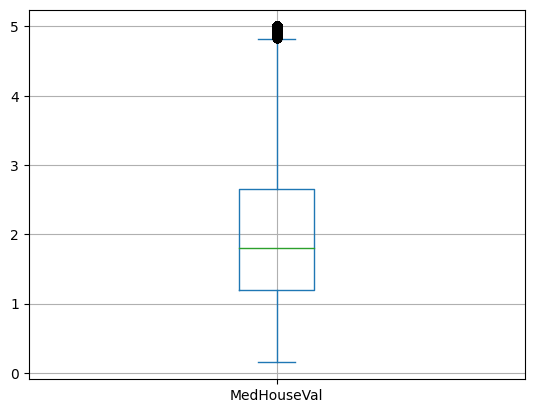

In [15]:
df['MedHouseVal'].plot(kind='box',grid = True)

<Axes: ylabel='Density'>

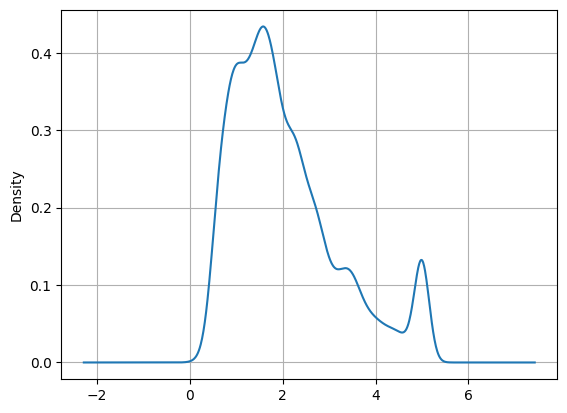

In [16]:
df['MedHouseVal'].plot(kind='kde',grid = True)

In [17]:
# Очевидно, что присутвуют выбросы, которые дают значительный вклад в искажение нормального распределения

### 6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки поделены на цветные категории, в ячейках указзано числовое значение корреляции

In [18]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

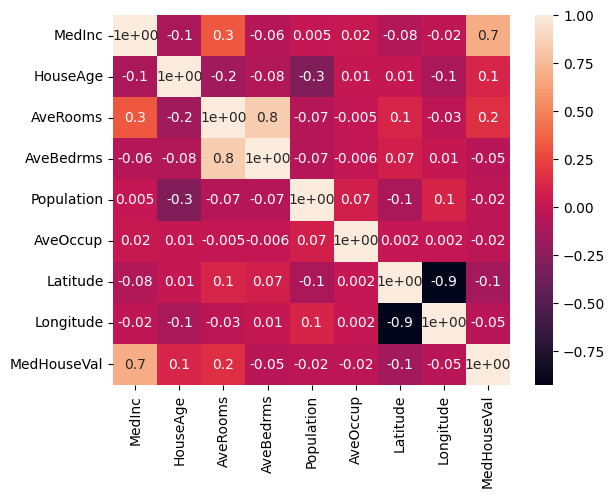

In [19]:
sns.heatmap(df.corr(),
    robust=False,
    annot=True,
    fmt='.1')

#### 6а) сделайте выводы

In [20]:
# Можно сказать, что признак "AveOccup" слабокоррелирует с любым другим признаком. 

In [21]:
df = df.drop(columns=['AveOccup'])

In [22]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,39.43,-121.32,0.847


In [23]:
X = df[list(df.columns)[:-1]]
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,39.43,-121.32


In [24]:
y = df['MedHouseVal']
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [26]:
new_model = LinearRegression().fit(X_train,y_train)

In [27]:
# Коэффициент детерминации на обучающихся данных
new_model.score(X_train,y_train)

0.6113161716418876

In [28]:
# Коэффициент детерминации на тестовых данных
new_model.score(X_test,y_test)

0.5750924063350602

In [29]:
# Вычислить RMSE для для тестовых данных
rmse = mean_squared_error(new_model.predict(X_test),y_test,squared=False)
rmse

0.7461921506296304

In [30]:
# Вычислить RMSE для для тестовых данных
rmse = mean_squared_error(new_model.predict(X_train),y_train,squared=False)
rmse

0.720821803932169

In [31]:
# В целом, можно сказать, что заметно улучшилась модель

### 7. Исследуйте оставленные признаки на выбросы

<Axes: >

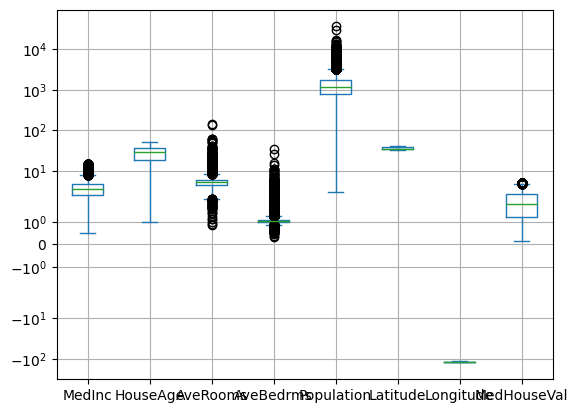

In [32]:
df.plot(kind='box',grid=True, logy='sym')

<Axes: >

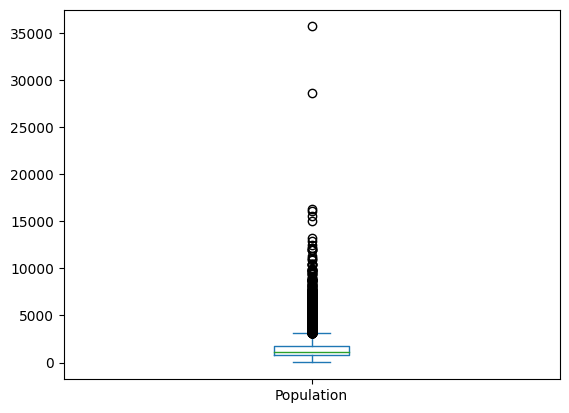

In [33]:
df['Population'].plot(kind='box')

In [34]:
z = np.abs(stats.zscore(df[['AveRooms','Population']]))

In [35]:
new_df = df[list(df.columns)][(z<10).all(axis=1)]

<Axes: >

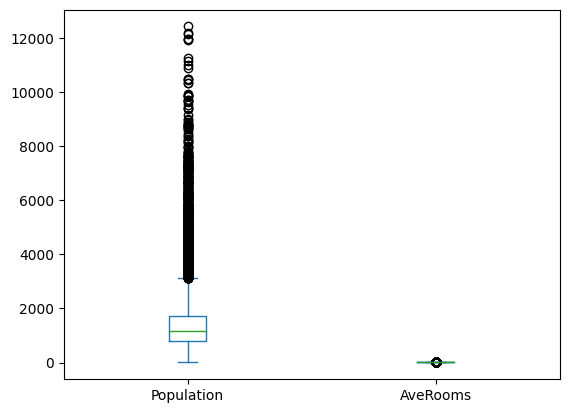

In [36]:
new_df[['Population','AveRooms']].plot(kind='box')

In [37]:
X = new_df[list(new_df.columns)[:-1]]
y = new_df['MedHouseVal']
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20608, dtype: float64

In [38]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude
count,20608.000000,20608.000000,20608.000000,20608.000000,20608.000000,20608.000000,20608.000000
mean,3.870926,28.659259,5.375441,1.085445,1420.036636,35.629329,-119.570034
std,1.900044,12.581361,1.676340,0.263661,1066.266226,2.134784,2.004091
min,0.499900,1.000000,0.846154,0.333333,3.000000,32.540000,-124.350000
25%,2.563850,18.000000,4.439360,1.005948,788.000000,33.930000,-121.800000
50%,3.534950,29.000000,5.226796,1.048676,1167.000000,34.255000,-118.490000
75%,4.743250,37.000000,6.047952,1.099222,1725.000000,37.710000,-118.010000
max,15.000100,52.000000,29.852941,6.500000,12427.000000,41.950000,-114.310000


In [39]:
y.describe()

count    20608.000000
mean         2.068764
std          1.153992
min          0.149990
25%          1.196750
50%          1.797500
75%          2.649000
max          5.000010
Name: MedHouseVal, dtype: float64

In [40]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42 )
one_more = LinearRegression().fit(X_train,y_train)
one_more.score(X_train,y_train)

0.6087452206430495

In [41]:
one_more = LinearRegression().fit(X_test,y_test)
one_more.score(X_test,y_test)

0.614858630890984

In [42]:
# Вычислить RMSE для для тестовых данных
rmse = mean_squared_error(one_more.predict(X_train),y_train,squared=False)
rmse

0.7226724669802498

In [43]:
# Вычислить RMSE для для тестовых данных
rmse = mean_squared_error(one_more.predict(X_test),y_test,squared=False)
rmse

0.7148771533932681

### 8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

In [44]:
X.loc[:,'Population'] = np.log(X.loc[:,'Population'])

/var/folders/kx/kq97lz2s39jdxr03l8m6m_7h0000gn/T/ipykernel_42773/4249369416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'Population'] = np.log(X.loc[:,'Population'])


In [45]:
X.loc[:,'AveRooms'] = np.sqrt(X.loc[:,'AveRooms'])

/var/folders/kx/kq97lz2s39jdxr03l8m6m_7h0000gn/T/ipykernel_42773/97227061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'AveRooms'] = np.sqrt(X.loc[:,'AveRooms'])


<Axes: >

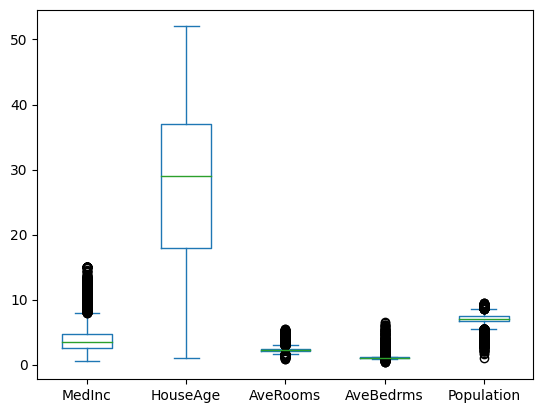

In [46]:
X[list(X.columns)[:-2]].plot(kind='box')

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2, random_state=42)

In [48]:
math_transform = LinearRegression().fit(X_train,y_train)
math_transform.score(X_train,y_train)

0.6087180335352831

In [49]:
math_transform = LinearRegression().fit(X_test,y_test)
math_transform.score(X_test,y_test)

0.6179452544878599

In [50]:
# Вычислить RMSE для для тестовых данных
rmse = mean_squared_error(math_transform.predict(X_test),y_test,squared=False)
rmse

0.7105753673360828

In [51]:
# Вычислить RMSE для для тестовых данных
rmse = mean_squared_error(math_transform.predict(X_train ),y_train,squared=False)
rmse

0.7230419193073019

### 9. Cформулируйте выводы по проделанной работе

|метрики       | Исходные данные | Удалили связанные признаки | Удалили выбросы | Математические преобразования|
|:------------:|:------------: |:---------------:| :------------:|:-----------:|
|  TRAIN       ||
|$R^2$         |  0.723 |   0.611     |  0.608 | 0.608|
| $RMSE$       |  0.728 |   0.746    |  0.722 | 0.710|
|  TEST    ||
|$R^2_{}$      |  0.595 |   0.575   |   0.614     |0.6179 |
| $RMSE$       |  0.609 |    0.720    |    0.714    |0.723 |

В целом, заметна положительная динамика в качестве моделей. 